<img src="https://www.uc3m.es/ss/Satellite?blobcol=urldata&blobkey=id&blobtable=MungoBlobs&blobwhere=1371573952659">

---

# WEB ANALYTICS COURSE 4 - SEMESTER 2
# BACHELOR IN DATA SCIENCE AND ENGINEERING

# LAB DATA VISUALIZATION IN THE WEB

---


In this block we will use data from the *Instituto Nacional de Estadística* [INE](https://www.ine.es/index.htm). We will be focus on the Tourism Sector.

We are going to analyze the tourism from two points of view. On the one hand, we are going to use the data that give us information on the history of travel in Spain. On the other hand, we will analyze employment in the tourism sector. You can visit the INE website for more information about the datasets. But in this [folder](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing) you can find the files that we will use in the labs.

# Lab1: Data Processing and Visualization in Python

## 0. Lab Preparation

1.  Study and have clear the concepts explained in the theoretical class and the introductory lab.

2.   Gain experience with the use of the [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and/or [Seaborn](https://seaborn.pydata.org/) and [Folium](https://python-visualization.github.io/folium/). The exercises of this lab will be mainly based on the utilization of functions offered by these libraries for data cleaning and data processing.

3. It is assumed students have experience in using Python notebooks. Either a local installation (e.g., local python installation + Jupyter) or a cloud-based solution (e.g., Google Colab). *We recommend the second option*.

## 1. Lab Introduction

* In this lab, we will prepare our dataset for later analysis and visualization using [Pandas](https://pandas.pydata.org/), [Matplotlib](https://matplotlib.org/) and/or [Seaborn](https://seaborn.pydata.org/) and [Folium](https://python-visualization.github.io/folium/).

* The lab will be done in groups of 2 people.

* The lab defines a set of milestones the students must complete. Upon completing every milestone, students should call the professor, who will check the correctness of the solution (*If the professor is busy, do not wait for them, move to the next milestone*).

* **The final mark will be computed as a function of the number of milestones successfully completed.**

* **Each group should also share their lab notebook with the professor upon the finalization of the lab.**

- It is recommended to use [Google Colab](https://colab.research.google.com/) to produce the Python notebook with the solution of the lab. Of course, if any student prefers using its local programming environment (e.g., jupyter) and python installation, they are welcome to do so.

In [1]:
from google.colab import drive
from numpy.ma.extras import average

drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## Milestone 1

1. Load the datasets about tourism [INE_tourism](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing) into dataframes
2. Prepare the data for later analysis, that is:
    - Split the column *Periodo* in *Year* and *Quarter* or *Month*.
  * Transform column numbers that are identified as Objects by Python to numbers. (Print *dtypes* of your dataframes to check it is done correctly).
  * Extract the Autonomous Community (CCAA) from the corresponding column.

In [2]:
# 1. Load the datasets about tourism
import pandas as pd

num_turistas_ccaa = pd.read_csv('./INE_ddbbs_DataVis_lab/INE_tourism/Número de turistas según comunidad autónoma de destino principal.csv', sep='\t')
num_turistas_motivo = pd.read_csv('./INE_ddbbs_DataVis_lab/INE_tourism/Número de turistas según motivo principal del viaje.csv', sep='\t')
viajes_ccaa = pd.read_csv('./INE_ddbbs_DataVis_lab/INE_tourism/Viajes, pernoctaciones, duración media y gasto por comunidad autónoma de residencia de los viajeros.csv', sep='\t')
viajes_ccaa_interno =pd.read_csv('./INE_ddbbs_DataVis_lab/INE_tourism/Viajes con destino principal interno, pernoctaciones, duración media y gasto por tipo de destino principal, según comunidad autónoma de residencia de los viajeros.csv', sep='\t')

In [3]:
# 2. Prepare the data for later analysis
# Split the column Periodo in Year and Quarter or Month.
for df in [num_turistas_ccaa, num_turistas_motivo]:
    df[['Year', 'Month']] = df['Periodo'].str.extract(r'(\d{4})(M\d{2})')
    df['Year'] = pd.to_numeric(df['Year'])

for df in [viajes_ccaa, viajes_ccaa_interno]:
    df[['Year', 'Quarter']] = df['Periodo'].str.extract(r'(\d{4})(T\d)')
    df['Year'] = pd.to_numeric(df['Year'])
num_turistas_ccaa.head()

Comunidades autónomas Tipo de dato  Periodo      Total  Year Month
0                 Total    Dato base  2021M09  4.691.486  2021   M09
1                 Total    Dato base  2021M08  5.194.212  2021   M08
2                 Total    Dato base  2021M07  4.395.384  2021   M07
3                 Total    Dato base  2021M06  2.215.710  2021   M06
4                 Total    Dato base  2021M05  1.363.624  2021   M05

In [4]:
num_turistas_motivo.head()

Motivo del viaje Tipo de dato  Periodo      Total  Year Month
0            Total    Dato base  2021M09  4.691.486  2021   M09
1            Total    Dato base  2021M08  5.194.212  2021   M08
2            Total    Dato base  2021M07  4.395.384  2021   M07
3            Total    Dato base  2021M06  2.215.710  2021   M06
4            Total    Dato base  2021M05  1.363.624  2021   M05

In [5]:
viajes_ccaa.head()

Comunidad autónoma de residencia Concepto turístico    Tipo de dato Periodo  \
0                            Total             Viajes  Valor absoluto  2021T2   
1                            Total             Viajes  Valor absoluto  2021T1   
2                            Total             Viajes  Valor absoluto  2020T4   
3                            Total             Viajes  Valor absoluto  2020T3   
4                            Total             Viajes  Valor absoluto  2020T2   

        Total  Year Quarter  
0  34.293.875  2021      T2  
1  15.220.538  2021      T1  
2  17.188.061  2020      T4  
3  46.136.493  2020      T3  
4   9.027.260  2020      T2

In [6]:
viajes_ccaa_interno.head()

Comunidad autónoma de residencia Tipo de destino Concepto turístico  \
0                            Total          España             Viajes   
1                            Total          España             Viajes   
2                            Total          España             Viajes   
3                            Total          España             Viajes   
4                            Total          España             Viajes   

     Tipo de dato Periodo       Total  Year Quarter  
0  Valor absoluto  2021T2  33.562.076  2021      T2  
1  Valor absoluto  2021T1  14.751.836  2021      T1  
2  Valor absoluto  2020T4  16.785.079  2020      T4  
3  Valor absoluto  2020T3  44.628.688  2020      T3  
4  Valor absoluto  2020T2   8.869.729  2020      T2

In [7]:
for df in [num_turistas_ccaa, num_turistas_motivo, viajes_ccaa, viajes_ccaa_interno]:
    df['Year'] = pd.to_numeric(df['Year'])
    df['Total'] = pd.to_numeric(df['Total'].str.replace('.','').str.replace(',','.'))
    print(f'------')
    print(df.dtypes)

------
Comunidades autónomas     object
Tipo de dato              object
Periodo                   object
Total                    float64
Year                       int64
Month                     object
dtype: object
------
Motivo del viaje     object
Tipo de dato         object
Periodo              object
Total               float64
Year                  int64
Month                object
dtype: object
------
Comunidad autónoma de residencia     object
Concepto turístico                   object
Tipo de dato                         object
Periodo                              object
Total                               float64
Year                                  int64
Quarter                              object
dtype: object
------
Comunidad autónoma de residencia     object
Tipo de destino                      object
Concepto turístico                   object
Tipo de dato                         object
Periodo                              object
Total                               

In [8]:
# Extract the Autonomous Community (CCAA) from the corresponding column.
## num_turistas_motivo does not have CCAA
num_turistas_ccaa['CCAA'] = num_turistas_ccaa['Comunidades autónomas'].str.extract(r'(?:\d+\s+)?(.*)')
for df in [viajes_ccaa, viajes_ccaa_interno]:
    df['CCAA'] = df['Comunidad autónoma de residencia'].str.extract(r'(?:\d+\s+)?(.*)')

## Milestone 2

1. Load the datasets about employment ([INE_employment](https://drive.google.com/file/d/13Jhw6LWyja1z1be3bFKAWOh5KeM3XuqZ/view?usp=sharing)) into dataframes
2. Prepare the data for later analysis, that is:
  * Split the column *Periodo* in *Year* and *Quarter* or *Month*.
  * Transform column numbers that are identified as Objects by Python to numbers. (Print *dtypes* of your dataframes to check it is done correctly).
  * Extract the Autonomous Community (CCAA) from the corresponding column.
  * From the "Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo" file:
    * Extract CNAE Code from column *Rama de actividad CNAE 2009* (you must regular expressions).
    * Filter the dataframe to obtain the rows with CNAE Codes: 49, 50, 51, 52, 55, 56, 77, 79, 90, 91, 93.
  * From the "Ocupados por rama de actividad, sexo y comunidad autónoma" file:
    * Filter the dataframe to obtain only the rows with the following activities (*Rama de actividad CNAE 2009*): 
      * G + H + I
      * M + N
      * R + S + T + U



In [9]:
# 1. Load the datasets about employment
empleo_actividad = pd.read_csv('./INE_ddbbs_DataVis_lab/INE_employment/Ocupados por rama de actividad, sexo y comunidad autónoma.csv', sep='\t')
empleo_rama = pd.read_csv('./INE_ddbbs_DataVis_lab/INE_employment/Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo.csv', sep='\t')

In [10]:
empleo_actividad.head()

Sexo Comunidades y Ciudades Autónomas Rama de actividad CNAE 2009  \
0  Ambos sexos                   Total Nacional                       Total   
1  Ambos sexos                   Total Nacional                       Total   
2  Ambos sexos                   Total Nacional                       Total   
3  Ambos sexos                   Total Nacional                       Total   
4  Ambos sexos                   Total Nacional                       Total   

  Periodo     Total  
0  2021T3    20.031  
1  2021T2  19.671,7  
2  2021T1  19.206,8  
3  2020T4  19.344,3  
4  2020T3  19.176,9

In [11]:
empleo_rama.head()

Rama de actividad CNAE 2009         Sexo          Unidad Periodo     Total
0                       Total  Ambos sexos  Valor absoluto  2021T3    20.031
1                       Total  Ambos sexos  Valor absoluto  2021T2  19.671,7
2                       Total  Ambos sexos  Valor absoluto  2021T1  19.206,8
3                       Total  Ambos sexos  Valor absoluto  2020T4  19.344,3
4                       Total  Ambos sexos  Valor absoluto  2020T3  19.176,9

In [12]:
# 2. Prepare the data for later analysis
## Split the column Periodo in Year and Quarter or Month.
for df in [empleo_actividad, empleo_rama]:
    df[['Year', 'Quarter']] = df['Periodo'].str.extract(r'(\d{4})(T\d)')
    df['Year'] = pd.to_numeric(df['Year'])

In [13]:
# Transform column numbers that are identified as Objects by Python to numbers.
for df in [empleo_actividad, empleo_rama]:
    df['Total'] = pd.to_numeric(df['Total'].str.replace('.','').str.replace(',','.'))
    print(f'------')
    print(df.dtypes)

------
Sexo                                 object
Comunidades y Ciudades Autónomas     object
Rama de actividad CNAE 2009          object
Periodo                              object
Total                               float64
Year                                  int64
Quarter                              object
dtype: object
------
Rama de actividad CNAE 2009     object
Sexo                            object
Unidad                          object
Periodo                         object
Total                          float64
Year                             int64
Quarter                         object
dtype: object


In [14]:
# Extract the Autonomous Community (CCAA) from the corresponding column.
empleo_actividad['CCAA'] = empleo_actividad['Comunidades y Ciudades Autónomas'].str.extract(r'(?:\d+\s+)?(.*)')

In [15]:
# From the "Ocupados por sexo y rama de actividad. Valores absolutos y porcentajes respecto del total de cada sexo" file:
## Extract CNAE Code from column Rama de actividad CNAE 2009 (you must regular expressions).
empleo_rama['CNAE'] = empleo_rama['Rama de actividad CNAE 2009'].str.extract(r'^(Total|\d+)')
## Filter the dataframe to obtain the rows with CNAE Codes: 49, 50, 51, 52, 55, 56, 77, 79, 90, 91, 93.
empleo_rama_filtered = empleo_rama[empleo_rama['CNAE'].isin(['49', '50', '51', '52', '55', '56', '77', '79', '90', '91', '93'])]

In [16]:
# From the "Ocupados por rama de actividad, sexo y comunidad autónoma" file:
## Filter the dataframe to obtain only the rows with the following activities (Rama de actividad CNAE 2009):
### G + H + I
### M + N
### R + S + T + U
res = []
for expr in ['G \+ H \+ I ', ' M \+ N ', ' R \+ S \+ T \+ U ']:
    res.append(empleo_actividad[empleo_actividad['Rama de actividad CNAE 2009'].str.contains(expr)])

empleo_actividad_filtered = pd.concat(res)
    

## Milestone 3

Now, we will visualize our pre-processed datasets using [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). You can choose one or both libraries for this milestones.  

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

1. Plot a bar graph of employed people in the toursim sector by activity (CNAE codes selected above) for both sexs, in absolute values and splitted by years.
2. Plot a bar graph of employed people in the toursim sector by year, sex and CCAA.
3. Plot a boxplot graph containing the distribution of the number of tourists by year per CCAA.

---


In [18]:
empleo_rama_filtered[empleo_rama_filtered['Sexo'] == 'Ambos sexos'].groupby(['Year', 'CNAE'], as_index=False)['Total'].sum()

Year CNAE   Total
0    2008   49  2465.5
1    2008   50    85.3
2    2008   51   214.2
3    2008   52   627.1
4    2008   55  1322.1
..    ...  ...     ...
149  2021   77   140.6
150  2021   79   192.1
151  2021   90   186.9
152  2021   91   111.3
153  2021   93   643.6

[154 rows x 3 columns]

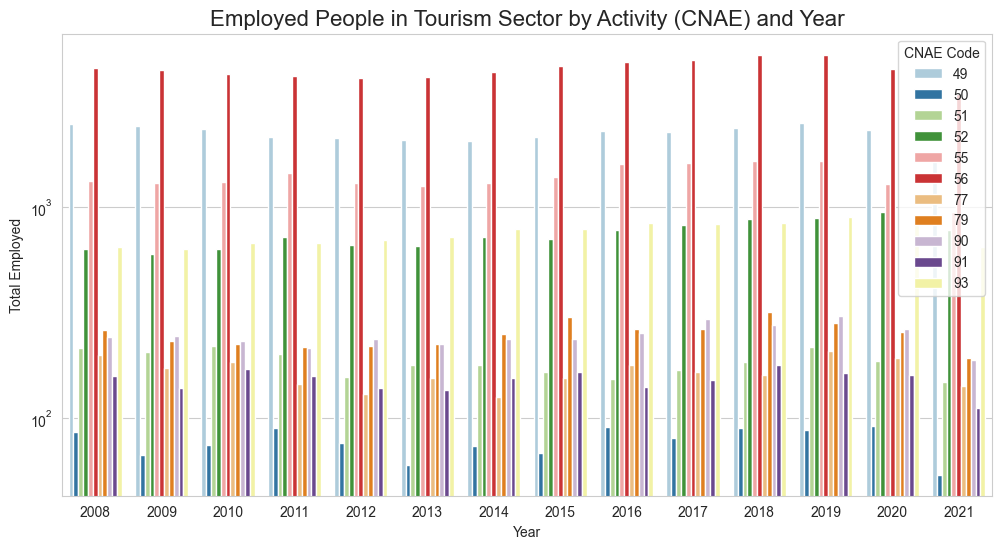

In [147]:
# 1. Plot a bar graph of employed people in the toursim sector by activity (CNAE codes selected above) for both sexs, in absolute values and splitted by years.
import matplotlib.pyplot as plt
import seaborn as sns
# Plot a bar graph of employed people in the toursim sector by activity (CNAE codes selected above) for 'ambos sexos', in absolute values and splitted by years.
# Create the plot splitted by years
plt.figure(figsize=(12, 6))
sns.barplot(
    data=empleo_rama_filtered[empleo_rama_filtered['Sexo'] == 'Ambos sexos'].groupby(['Year', 'CNAE'], as_index=False)[
        'Total'].sum(),
    x='Year',
    y='Total',
    hue='CNAE',
    errorbar=None,
    palette='Paired')

plt.title('Employed People in Tourism Sector by Activity (CNAE) and Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Employed')
plt.yscale('log')
plt.legend(title='CNAE Code')
plt.show()

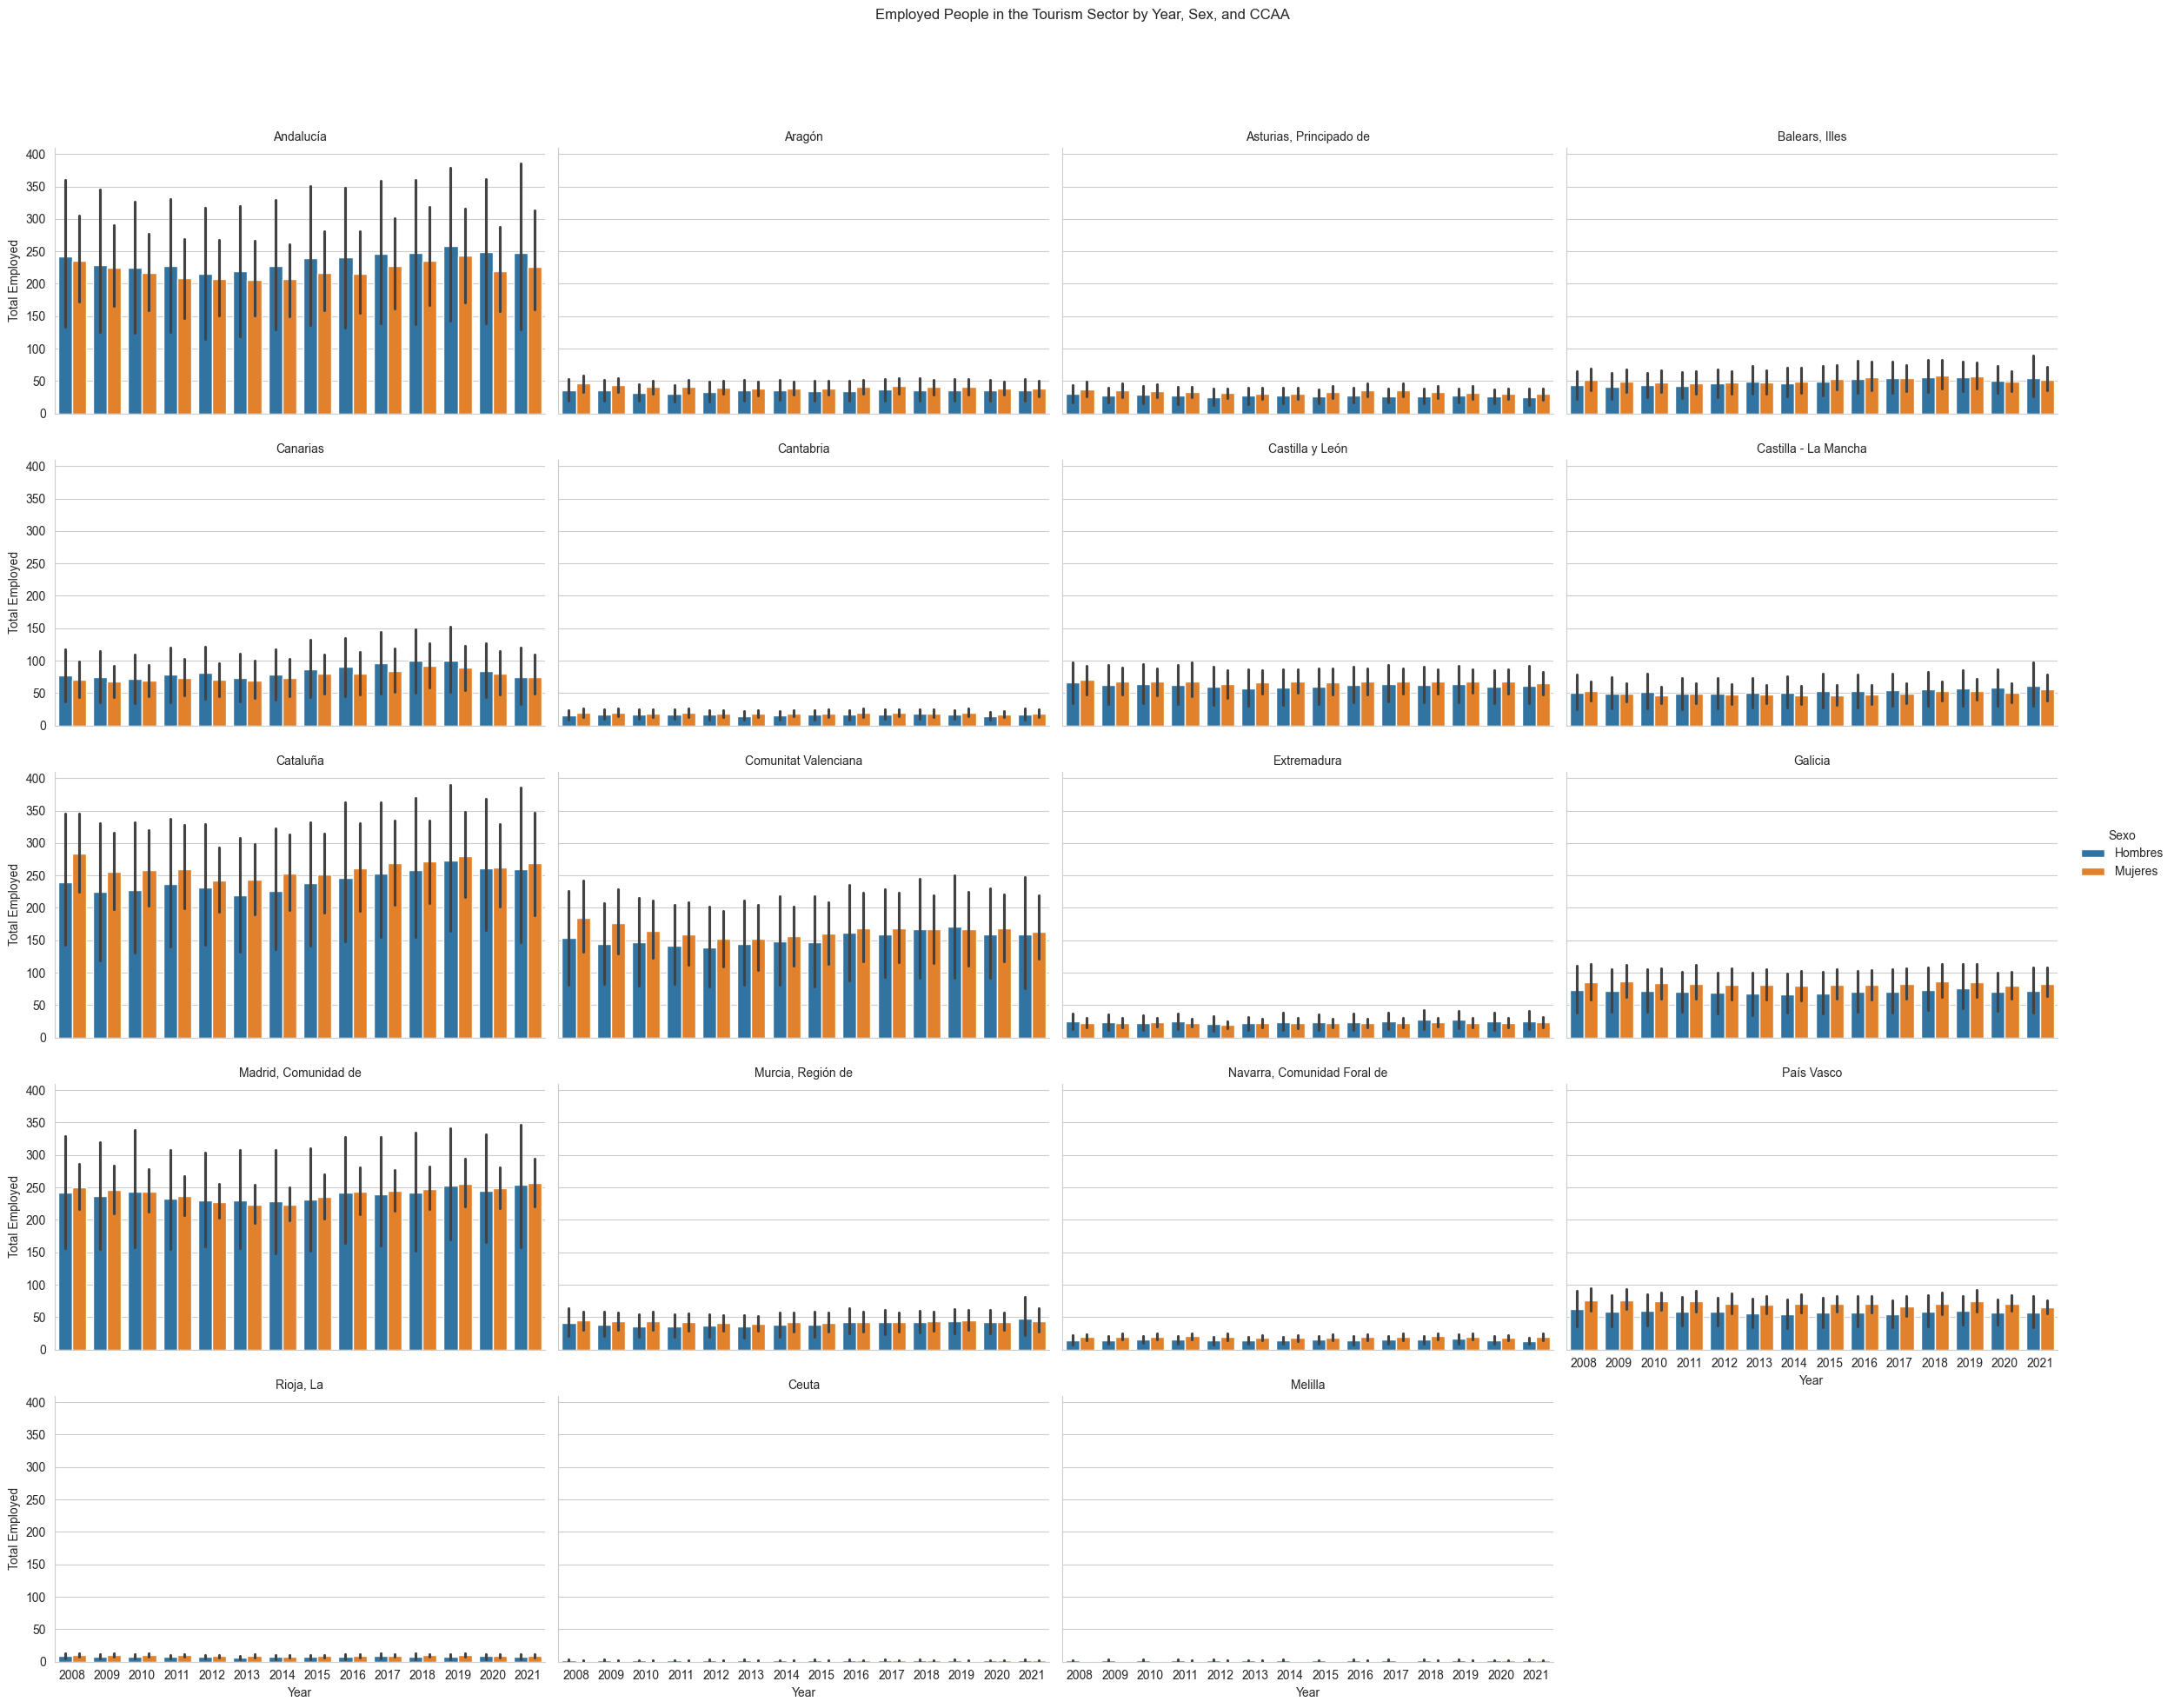

In [39]:
# 2. Plot a bar graph of employed people in the toursim sector by year, sex and CCAA

filtered_df = empleo_actividad_filtered[empleo_actividad_filtered['Sexo'] != 'Ambos sexos']
filtered_df = filtered_df[filtered_df['CCAA'] != 'Total Nacional']

g = sns.catplot(
    data=filtered_df,
    x='Year',
    y='Total',
    hue='Sexo',
    col='CCAA',  
    kind='bar',
    col_wrap=4,
    height=4, 
    aspect=1.5
)

# Add titles and adjust layout
g.set_titles("{col_name}")  # Use the CCAA name as the title of each subplot
g.set_axis_labels("Year", "Total Employed")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Employed People in the Tourism Sector by Year, Sex, and CCAA")

plt.show()


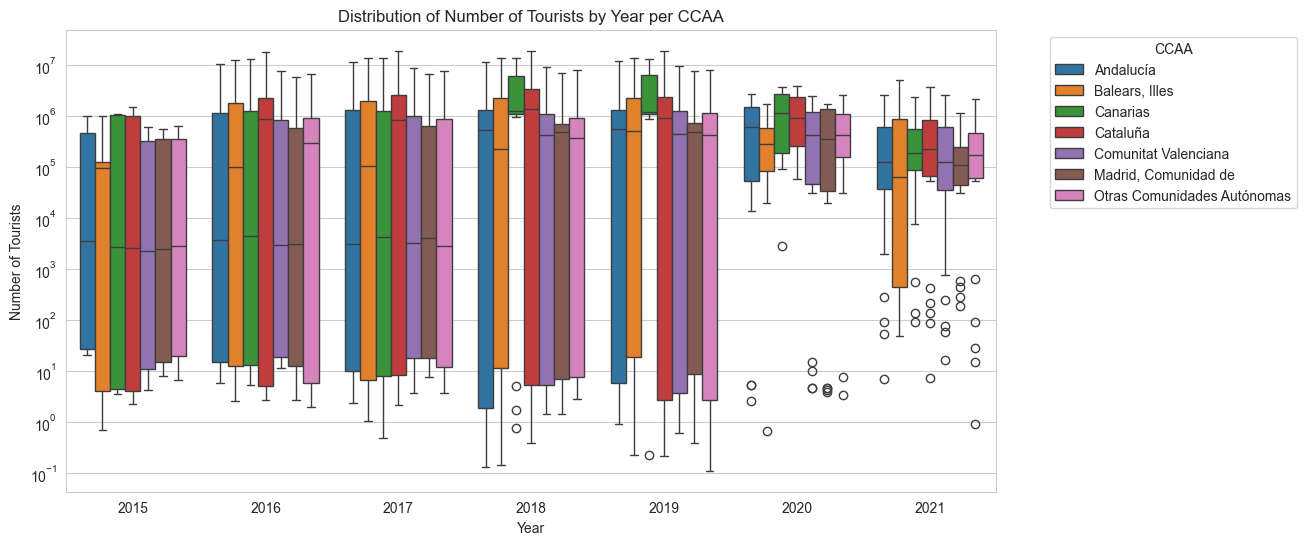

In [41]:
# 3. Plot a boxplot graph containing the distribution of the number of tourists by year per CCAA
plt.figure(figsize=(12, 6))
sns.boxplot(
    data = num_turistas_ccaa[num_turistas_ccaa['CCAA'] != 'Total'],
    x='Year',
    y='Total',
    hue='CCAA',
    log_scale=True
)
plt.title("Distribution of Number of Tourists by Year per CCAA")
plt.xlabel("Year")
plt.ylabel("Number of Tourists")
plt.legend(title="CCAA", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Milestone 4

1. Plot a line plot representing the variation across time of the number of turists by reason for the trip.
2. Plot the time series of the total and average expenses by CCAA of residency for those trips within the Autonomous Community and outside (*Dentro de la Comunidad Autónoma* and *A otra Comunidad Autónoma*).

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

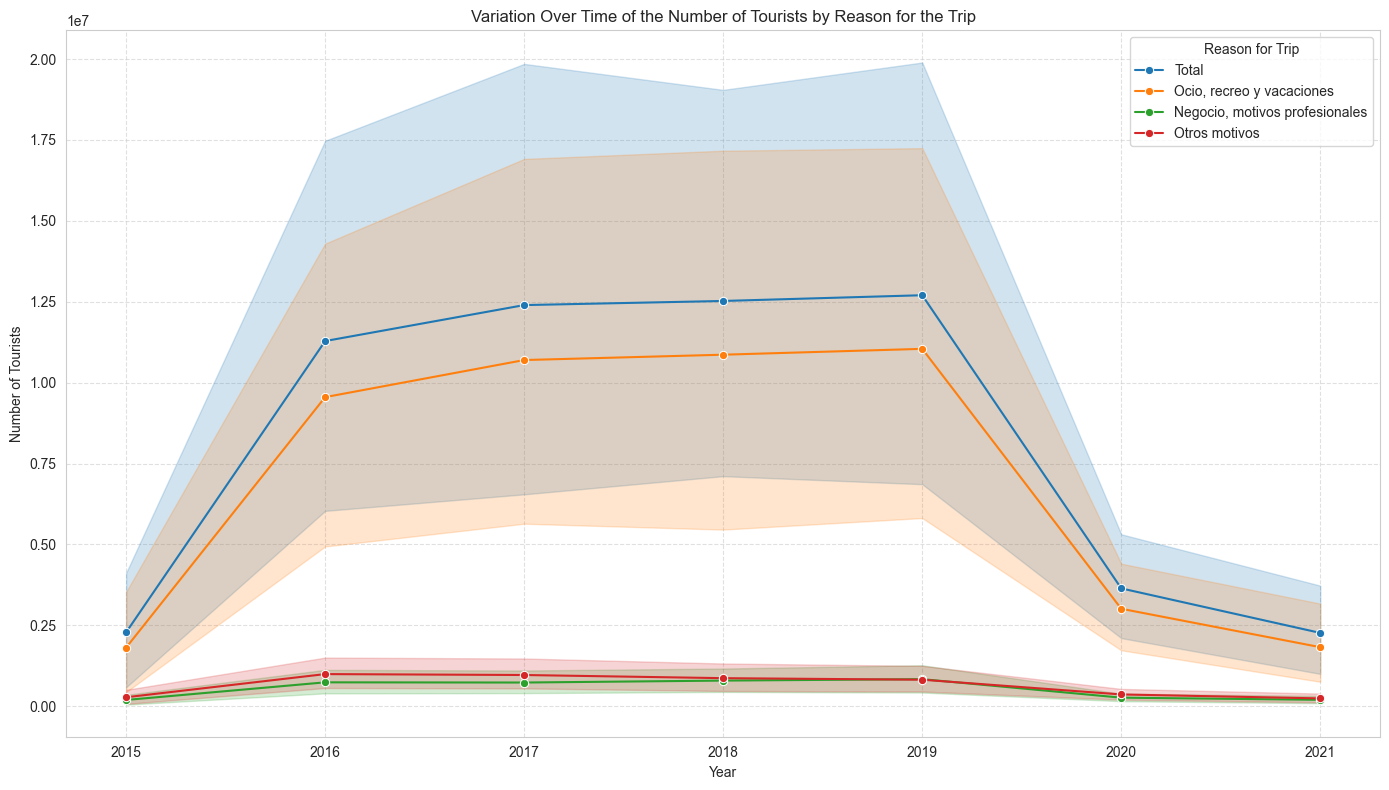

In [22]:
# 1. Plot a line plot representing the variation across time of the number of turists by reason for the trip.
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=num_turistas_motivo,
    x='Year',
    y='Total',
    hue='Motivo del viaje',
    marker='o'
)
plt.title('Variation Over Time of the Number of Tourists by Reason for the Trip')
plt.xlabel('Year')
plt.ylabel('Number of Tourists')
plt.legend(title='Reason for Trip')
plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

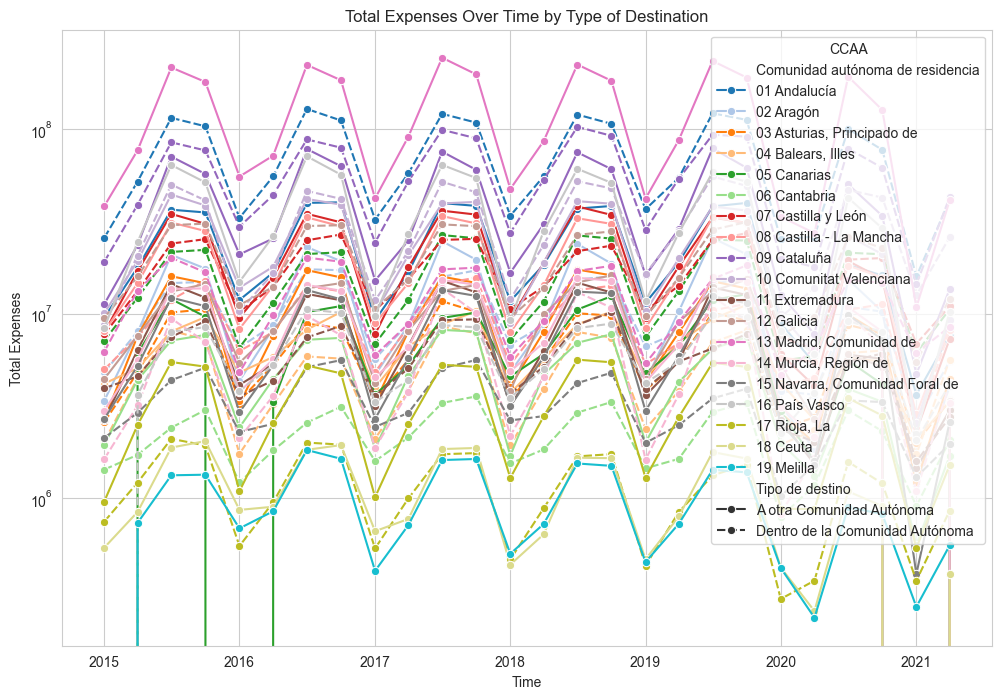

In [47]:
# 2. Plot the time series of the total and average expenses by CCAA of residency for those trips within the Autonomous Community and outside (Dentro de la Comunidad Autónoma and A otra Comunidad Autónoma).
# Filter for trips within and outside the Autonomous Community


# Group data to calculate total and average expenses
expenses_grouped = (
    viajes_ccaa_interno[
        viajes_ccaa_interno['Tipo de destino'].str.contains('Comunidad', na=False)
    ].groupby(['Year', 'Quarter', 'Tipo de destino', 'Comunidad autónoma de residencia'])['Total']
    .agg(['sum', 'mean'])
    .reset_index()
    .rename(columns={'sum': 'Total Expenses', 'mean': 'Average Expenses'})
)

quarter_to_month = {
    'T1': '01',  # January
    'T2': '04',  # April
    'T3': '07',  # July
    'T4': '10'   # October
}

expenses_grouped['Date'] = pd.to_datetime(
    expenses_grouped['Year'].astype(str) + '-' + expenses_grouped['Quarter'].astype(str).replace(quarter_to_month) + '-01'
)

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=expenses_grouped[expenses_grouped['Comunidad autónoma de residencia'] != 'Total'],
    x='Date',
    y='Total Expenses',
    hue='Comunidad autónoma de residencia',
    style='Tipo de destino',
    marker='o',
    palette='tab20',
)
plt.title("Total Expenses Over Time by Type of Destination")
plt.xlabel("Time")
plt.ylabel("Total Expenses")
plt.yscale("log")
plt.legend(title="CCAA")
plt.grid(True)
plt.show()

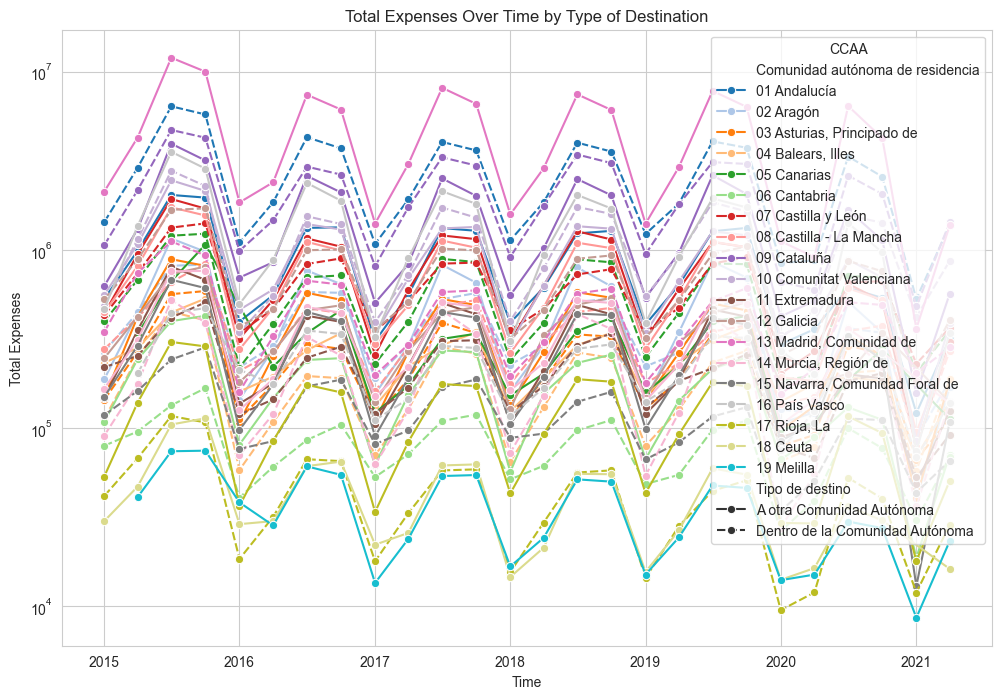

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=expenses_grouped[expenses_grouped['Comunidad autónoma de residencia'] != 'Total'],
    x='Date',
    y='Average Expenses',
    hue='Comunidad autónoma de residencia',
    style='Tipo de destino',
    marker='o',
    palette='tab20',
)
plt.title("Total Expenses Over Time by Type of Destination")
plt.xlabel("Time")
plt.ylabel("Total Expenses")
plt.yscale("log")
plt.legend(title="CCAA")
plt.grid(True)
plt.show()

## Milestone 5

1. Create an interactive map with information about the number of trips, the average duration of the trips, and expenses by CCAA of residency in the year 2021. It must be a choropleth map based on the number of trips.

For this milestone, you need to create a map using the [Folium](https://python-visualization.github.io/folium/) library. You also need to download the boundaries (GeoJson) of the Spanish CCAAs. There are many resources where you can find this information, one of them is [opendatasoft](https://public.opendatasoft.com/explore/?sort=modified).

*Note that you may need to modify/reshape the dataframe to accommodate the data for the visualization part*.

In [149]:
res = []

for df, aggregation, column in [(num_turistas_ccaa, 'sum', 'Comunidades autónomas'), (viajes_ccaa_interno, 'mean', 'Comunidad autónoma de residencia')]:
    filtered_df = []
    df['CCAA_code'] = df[column].str.extract(r'^([0-9]+)')
    filtered_df = df[(df['Year'] == 2021)&(df['CCAA'] != 'Total')]
    res.append(filtered_df.groupby(['CCAA_code', 'CCAA']).agg(aggregation=('Total', aggregation)).reset_index())

total_trips = res[0]
avg_expenses_cca = res[1]

In [150]:
import pandas as pd
import folium
import json
from IPython.display import display

geojson_path = './georef-spain-comunidad-autonoma.geojson'
with open(geojson_path, 'r', encoding='utf-8') as file:
    geojson_data = json.load(file)

for feature in geojson_data["features"]:
    region_code = feature["properties"]["acom_code"]
    
    trips = total_trips[total_trips["CCAA_code"].str.contains(region_code)]
    expenses = avg_expenses_cca[avg_expenses_cca["CCAA_code"].str.contains(region_code)]

    feature["properties"].update({
        "total_trips": trips['aggregation'].values[0] if not trips.empty else 0,
        "acom_name": expenses['CCAA'].values[0] if not expenses.empty else "Unknown",
        "average_expenses": expenses['aggregation'].values[0] if not expenses.empty else 0
    })

m = folium.Map(location=[40.4168, -3.7038], zoom_start=6, tiles="cartodbpositron")

folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth",
    data=avg_expenses_cca,
    columns=["CCAA_code", "aggregation"],
    key_on="feature.properties.acom_code",
    fill_color="YlOrRd",
    line_color="black",
    fill_opacity=0.7,
    line_opacity=0,
    legend_name="Average Expenses (2021)"
).add_to(m)

folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        "fillColor": "#ffff00",
        "color": "black",
        "weight": 0.2,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["acom_name", "total_trips", "average_expenses"],
        aliases=["CCAA: ", "Total Trips: ", "Average Expenses: "],
    )
).add_to(m)

map_output_path = 'spain_trips_2021_map.html'
m.save(map_output_path)
print(f"Map saved to {map_output_path}")
display(m)

Map saved to spain_trips_2021_map.html


## Milestone 6

** **This milestone does not count for grade.** **

Save and store the datasets processed for use them in  Lab2: Google Data Studio.


# Lab2: Google Data Studio


## 0. Lab Preparation

1.  Study and have clear the concepts explained in the theoretical class and the introductory lab.

2.   Gain experience with the use of [Google Data Studio](https://datastudio.google.com/). The goals of this lab will be mainly based on the utilization of this tool to create a dashboard.


## 1. Lab Introduction

* In this lab, we will use the dataset of the previous lab for visualization using [Google Data Studio](https://datastudio.google.com/).

* The lab will be done in groups of 2 people.

* The lab defines a set of guidelines the students must acomplish.

* **The grade will depend directly on the final result of your dashboard. Make it as visual as possible!**

* **Each group should also share their dashboard with the professor upon the finalization of the lab.**


## 2. Lab guidelines

For this practice, you have to use **Google Data Studio**. The style to use is free. The clearer and more visual your dashboard is, the better will be the grade.

Your dashboard must have at least the following elements:

1. A highlight box with total results.
2. A chart with a time series.
3. A pie chart.
4. A bar chart.
5. A table summarizing results.
6. A map that represents the data by CCAAs.

As you can see, the instructions are open-ended. You just have to represent the data in a meaningful way.
You will see that the processing we have done in the first lab is helpful for this part. In case you need to do some extra processing or modification of the data, you must do it in Python in this notebook, and it must be reflected and explained here.


---



To upload your dashboard to AG, click on Share -> Download as PDF -> Add a link back to the report. That will generate a PDF that you have to upload to AG.

Apart from that, for those taking the course remotely, I need you to invite me to your Data Studio project. (Share -> Invite people -> Add people), and to send a word document explaining how you build the dashboard.